In [2439]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2440]:
# Load the dataset
df = pd.read_csv('C:\\Users\\chave\\OneDrive\\Desktop\\abhinav\\dataset\\ulcers.csv')

# Display first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values if necessary
df.fillna(df.median(), inplace=True)

   NSAIDUse  H.pyloriInfection  StressLevels  AlcoholConsumption  \
0         0                  1             2                   1   
1         0                  1             0                   1   
2         1                  0             2                   0   
3         1                  1             0                   1   
4         0                  1             0                   0   

   SmokingStatus  FamilyUlcerProblem  Gender  Age  AbdominalPain  \
0              0                   0       1   27              1   
1              1                   0       0   31              0   
2              0                   0       1    6              0   
3              1                   0       0   50              1   
4              0                   1       0   85              1   

   AcidityLevel  Outcome  
0           6.0        1  
1           3.5        1  
2           7.0        0  
3           6.5        1  
4           7.3        1  
NSAIDUse            

In [2441]:
df.head(10)

,NSAIDUse,H.pyloriInfection,StressLevels,AlcoholConsumption,SmokingStatus,FamilyUlcerProblem,Gender,Age,AbdominalPain,AcidityLevel,Outcome
0,0,1,2,1,0,0,1,27,1,6.0,1
1,0,1,0,1,1,0,0,31,0,3.5,1
2,1,0,2,0,0,0,1,6,0,7.0,0
3,1,1,0,1,1,0,0,50,1,6.5,1
4,0,1,0,0,0,1,0,85,1,7.3,1
5,1,0,1,1,1,0,1,21,0,8.0,0
6,1,1,0,0,0,0,0,65,1,7.0,1
7,0,0,2,1,1,1,0,29,0,5.0,0
8,1,1,0,0,0,1,1,53,1,7.0,1
9,0,1,2,1,1,1,0,24,1,5.0,1


In [2442]:
df.shape

(197, 11)

In [2443]:
df.columns

Index(['NSAIDUse', 'H.pyloriInfection', 'StressLevels', 'AlcoholConsumption',
       'SmokingStatus', 'FamilyUlcerProblem', 'Gender', 'Age', 'AbdominalPain',
       'AcidityLevel', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

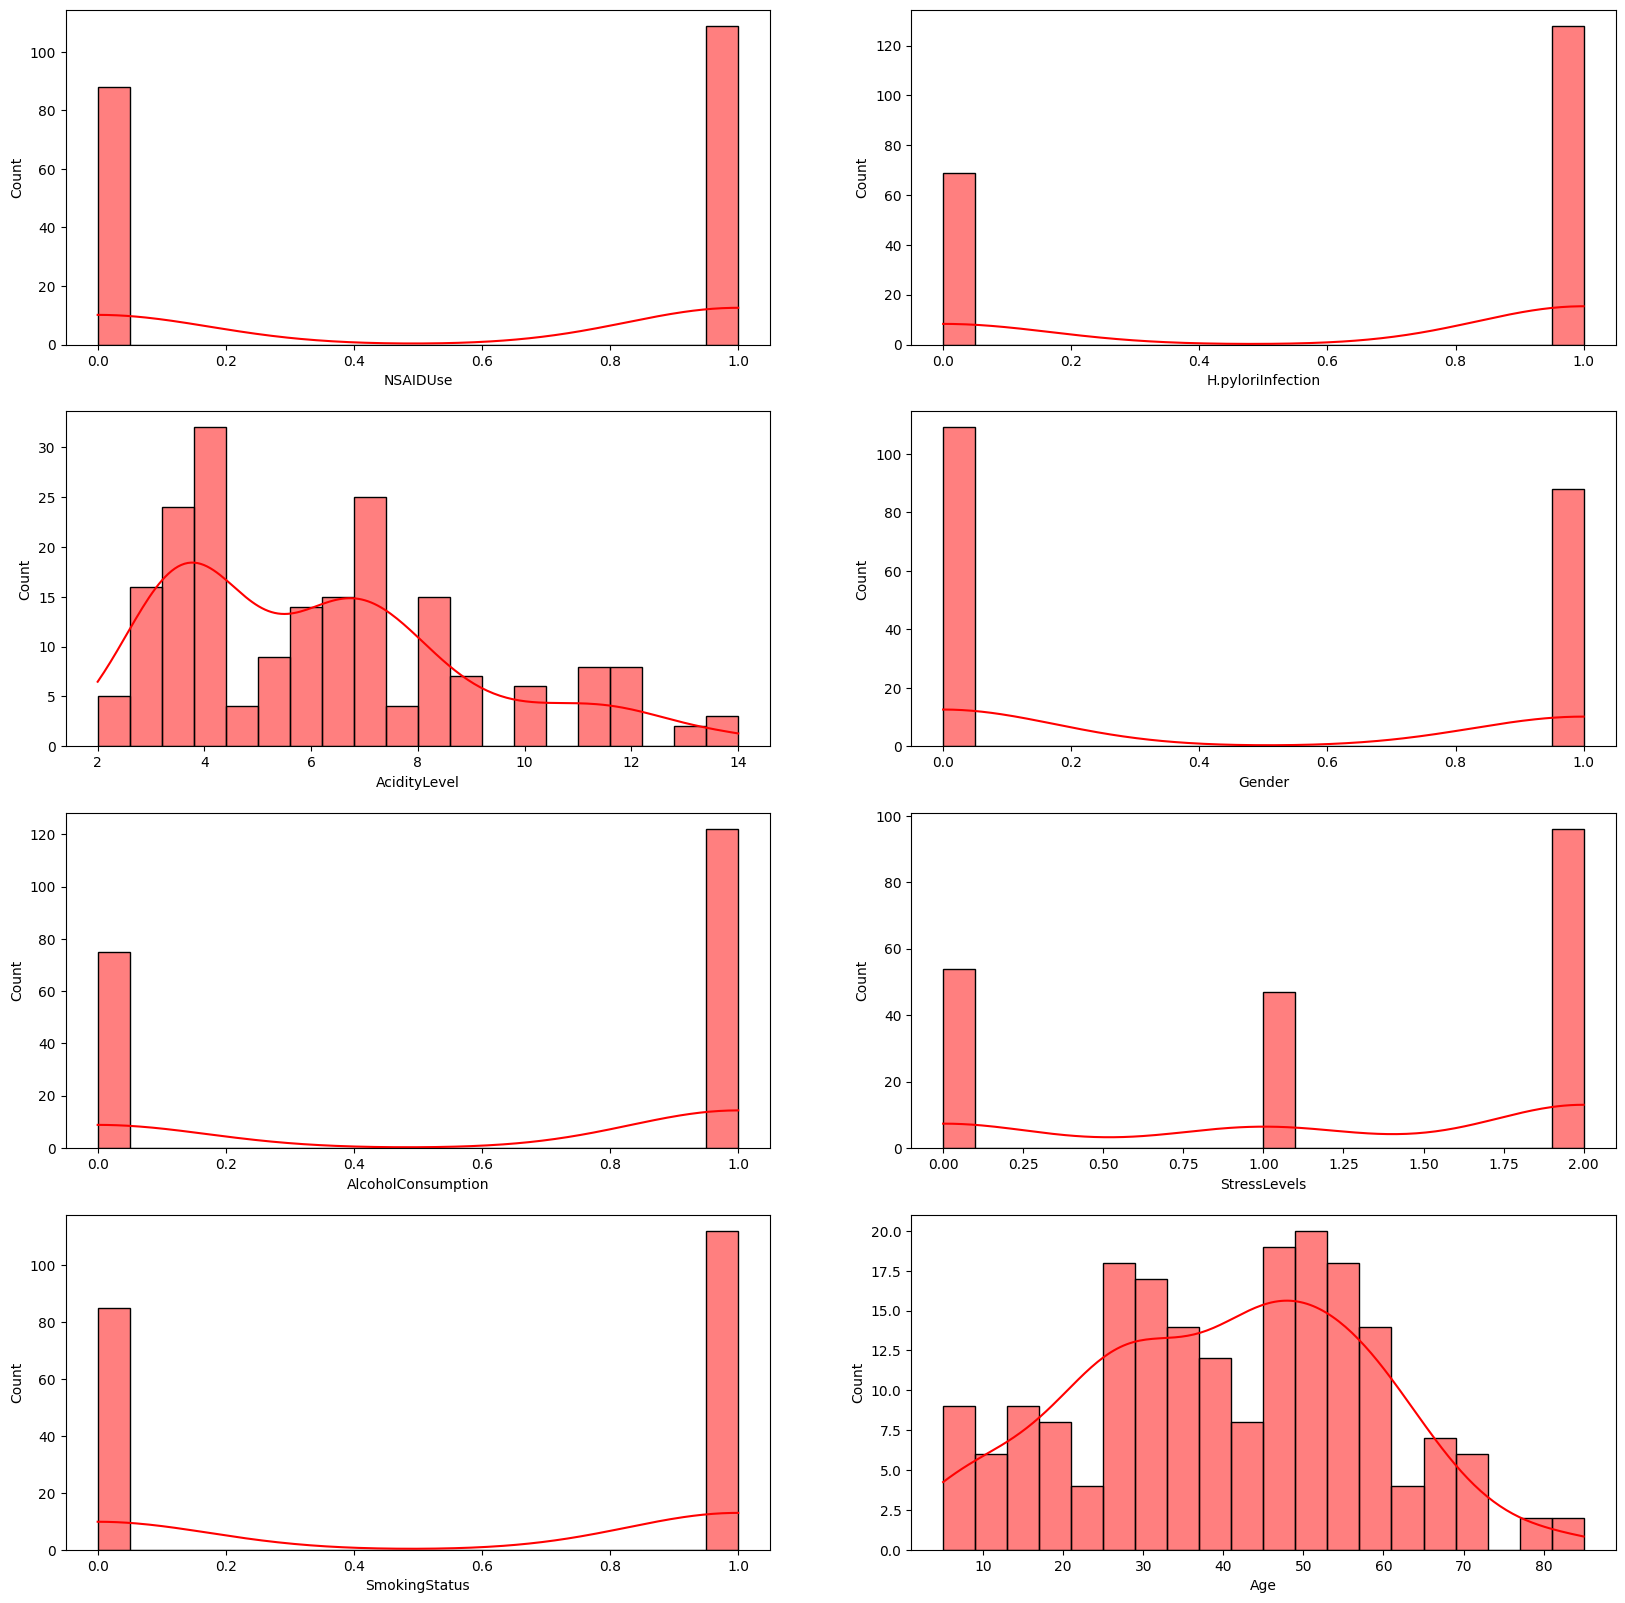

In [2444]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
sns.histplot(df['NSAIDUse'], bins=20, ax=ax[0, 0], color="red", kde=True)
ax[0, 0]
sns.histplot(df['H.pyloriInfection'], bins=20, ax=ax[0, 1], color="red", kde=True)
ax[0, 1]

sns.histplot(df['AcidityLevel'], bins=20, ax=ax[1, 0], color="red", kde=True)
ax[1, 0]

sns.histplot(df['Gender'], bins=20, ax=ax[1, 1], color="red", kde=True)
ax[1, 1]

sns.histplot(df['AlcoholConsumption'], bins=20, ax=ax[2, 0], color="red", kde=True)
ax[2, 0]

sns.histplot(df['StressLevels'], bins=20, ax=ax[2, 1], color="red", kde=True)
ax[2, 1]

sns.histplot(df['SmokingStatus'], bins=20, ax=ax[3, 0], color="red", kde=True)
ax[3, 0]

sns.histplot(df['Age'], bins=20, ax=ax[3, 1], color="red", kde=True)
ax[3, 1]


In [2445]:
# df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
# df['FamilyUlcerProblem'] = df['FamilyUlcerProblem'].map({'Yes': 1, 'No': 0})
# # df['AbdominalPain'] = df['AbdominalPain'].map({'High': 1, 'Low': 0})
# df['AlcoholConsumption'] = df['AlcoholConsumption'].map({'Yes': 1, 'No': 0})
# df['SmokingStatus'] = df['SmokingStatus'].map({'High': 2, 'Moderate': 1, 'Low': 0})
# # df['Outcome'] = df['Outcome'].map({ 'High': 1, 'Low': 0})

# Outlier detection and capping using IQR method
def cap_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[feature] > upper_bound, feature] = upper_bound.astype(int)
    df.loc[df[feature] < lower_bound, feature] = lower_bound.astype(int)

# Apply outlier capping to all numerical features
numerical_features = df.select_dtypes(include='number').columns
for feature in numerical_features:
    cap_outliers(feature)

In [2446]:
# Define feature columns and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2447]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2448]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Save the trained model
pickle.dump(model, open('stomach_ulcer_model.pkl', 'wb'))

In [2449]:
df.describe()

,NSAIDUse,H.pyloriInfection,StressLevels,AlcoholConsumption,SmokingStatus,FamilyUlcerProblem,Gender,Age,AbdominalPain,AcidityLevel,Outcome
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.553299,0.649746,1.213198,0.619289,0.568528,0.609137,0.446701,40.055838,0.583756,6.154315,0.649746
std,0.498418,0.478265,0.848305,0.486799,0.496544,0.489187,0.498418,17.881467,0.494191,2.772559,0.478265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,3.800000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41.000000,1.000000,6.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,55.000000,1.000000,7.800000,1.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,85.000000,1.000000,13.000000,1.000000


In [2450]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[21  0]
 [ 0 39]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        39

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score:
1.0


In [2451]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

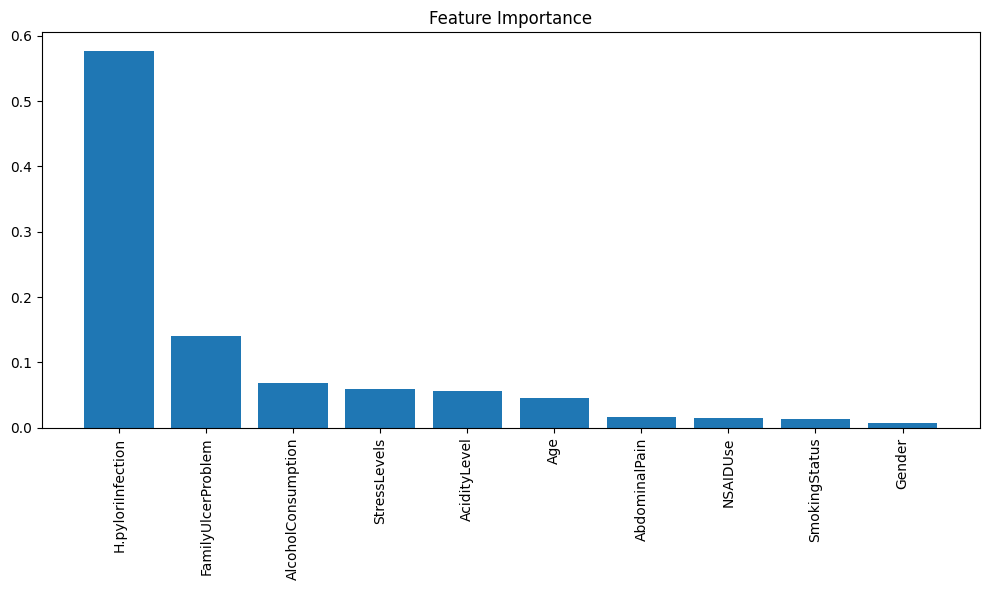

In [2452]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [2453]:
num_cols

['NSAIDUse',
 'H.pyloriInfection',
 'StressLevels',
 'AlcoholConsumption',
 'SmokingStatus',
 'FamilyUlcerProblem',
 'Gender',
 'Age',
 'AbdominalPain',
 'AcidityLevel',
 'Outcome']

In [2454]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

In [2455]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(df[column] ,palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

In [2456]:
df.corr()

,NSAIDUse,H.pyloriInfection,StressLevels,AlcoholConsumption,SmokingStatus,FamilyUlcerProblem,Gender,Age,AbdominalPain,AcidityLevel,Outcome
NSAIDUse,1.000000,-0.017601,0.395331,0.241770,0.412937,0.159119,0.211739,0.318812,0.504802,0.015801,-0.017601
H.pyloriInfection,-0.017601,1.000000,0.348474,0.541960,0.305686,0.676689,0.188828,0.206331,0.372996,-0.129097,1.000000
StressLevels,0.395331,0.348474,1.000000,0.592914,0.570764,0.570673,0.328687,0.281744,0.419655,0.005681,0.348474
AlcoholConsumption,0.241770,0.541960,0.592914,1.000000,0.456758,0.593156,0.325990,0.204082,0.355907,-0.015221,0.541960
SmokingStatus,0.412937,0.305686,0.570764,0.456758,1.000000,0.457407,0.411681,0.323367,0.283169,0.039716,0.305686
FamilyUlcerProblem,0.159119,0.676689,0.570673,0.593156,0.457407,1.000000,0.426795,0.220066,0.484331,-0.153169,0.676689
Gender,0.211739,0.188828,0.328687,0.325990,0.411681,0.426795,1.000000,0.039549,0.199460,-0.014693,0.188828
Age,0.318812,0.206331,0.281744,0.204082,0.323367,0.220066,0.039549,1.000000,0.476078,-0.519822,0.206331
AbdominalPain,0.504802,0.372996,0.419655,0.355907,0.283169,0.484331,0.199460,0.476078,1.000000,-0.143532,0.372996
AcidityLevel,0.015801,-0.129097,0.005681,-0.015221,0.039716,-0.153169,-0.014693,-0.519822,-0.143532,1.000000,-0.129097


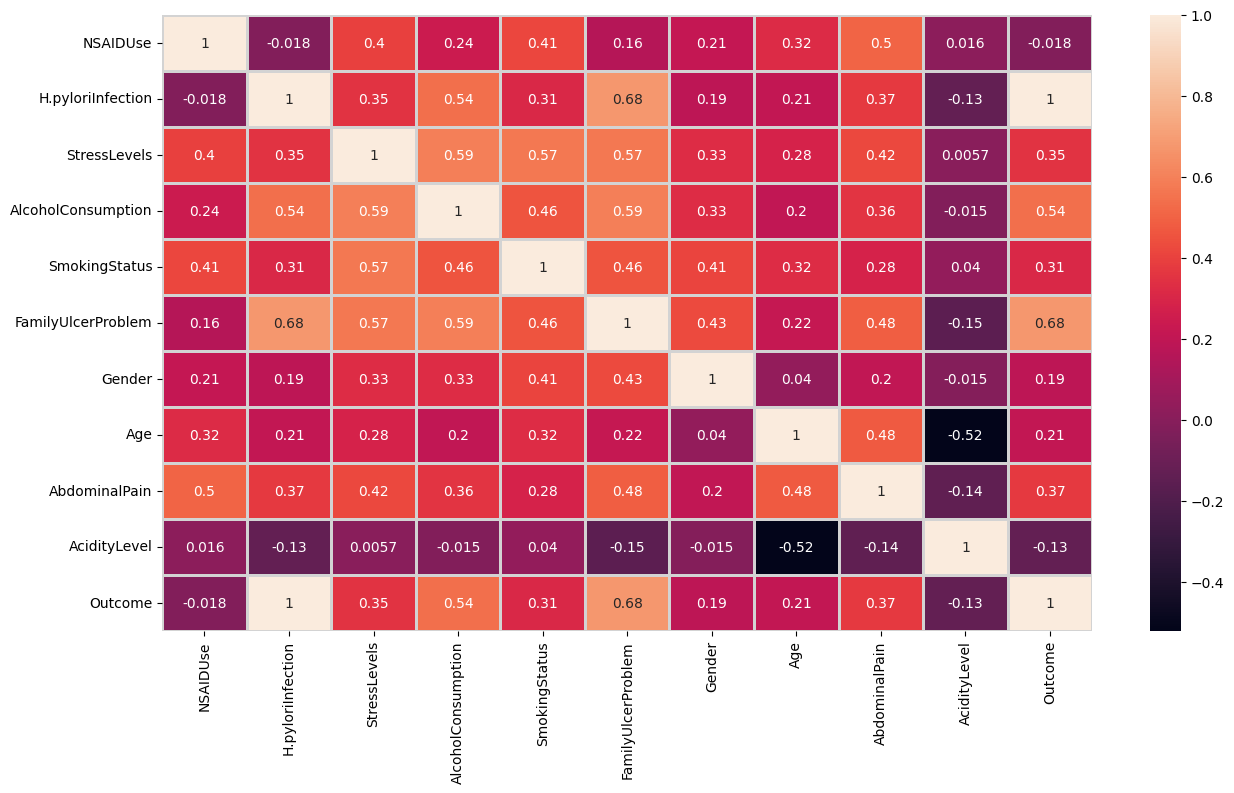

In [2457]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, linewidth=2, linecolor = 'lightgray')
plt.show()

In [2458]:
# checking for missing value
df.isnull().sum().sort_values(ascending=False)

NSAIDUse              0
H.pyloriInfection     0
StressLevels          0
AlcoholConsumption    0
SmokingStatus         0
FamilyUlcerProblem    0
Gender                0
Age                   0
AbdominalPain         0
AcidityLevel          0
Outcome               0
dtype: int64

In [2459]:
# two method
# radom sampling->higer null value
# mean/mode-> lower null value

In [2460]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [2461]:
# random sampling for numerical value
for col in num_cols:
    random_sampling(col)

In [2462]:
df[num_cols].isnull().sum()

NSAIDUse              0
H.pyloriInfection     0
StressLevels          0
AlcoholConsumption    0
SmokingStatus         0
FamilyUlcerProblem    0
Gender                0
Age                   0
AbdominalPain         0
AcidityLevel          0
Outcome               0
dtype: int64

In [2463]:
df[cat_cols].isnull().sum()

Series([], dtype: float64)

In [2464]:
# Feature Encoding

In [2465]:
# label_encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [2466]:
df.head()

,NSAIDUse,H.pyloriInfection,StressLevels,AlcoholConsumption,SmokingStatus,FamilyUlcerProblem,Gender,Age,AbdominalPain,AcidityLevel,Outcome
0,0,1,2,1,0,0,1,27,1,6.0,1
1,0,1,0,1,1,0,0,31,0,3.5,1
2,1,0,2,0,0,0,1,6,0,7.0,0
3,1,1,0,1,1,0,0,50,1,6.5,1
4,0,1,0,0,0,1,0,85,1,7.3,1


In [2467]:
# KNN

In [2468]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Testing Accuracy of KNN is {accuracy_score(y_test, knn.predict(X_test))}")

print(f"Confusion Matrix of KNN is \n {confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report of KNN is \n{classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.8978102189781022
Testing Accuracy of KNN is 0.8
Confusion Matrix of KNN is 
 [[13  8]
 [ 4 35]]

Classification Report of KNN is 
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.81      0.90      0.85        39

    accuracy                           0.80        60
   macro avg       0.79      0.76      0.77        60
weighted avg       0.80      0.80      0.79        60



In [2469]:
# Decision Tree

In [2470]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [2471]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 1.0
Testing Accuracy of DTC is 1.0
Confusion Matrix of DTC is 
 [[21  0]
 [ 0 39]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        39

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [2472]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, GRID_PARAMETER, cv=5, n_jobs=-1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


c:\Users\chave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2800 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1384 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\chave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [2473]:
# best paramer and best score
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
1.0


In [2474]:
dtc = grid_search_dtc.best_estimator_

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 0.8759124087591241
Testing Accuracy of DTC is 0.9
Confusion Matrix of DTC is 
 [[20  1]
 [ 5 34]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.97      0.87      0.92        39

    accuracy                           0.90        60
   macro avg       0.89      0.91      0.89        60
weighted avg       0.91      0.90      0.90        60



In [2475]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = "gini", max_depth = 10, max_features="sqrt", min_samples_leaf= 1, min_samples_split= 7, n_estimators = 400)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

In [2476]:
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(f"Training Accuracy of Random Forest is {accuracy_score(y_train, rand_clf.predict(X_train))}")
print(f"Testing Accuracy of Random Forest is {accuracy_score(y_test, rand_clf.predict(X_test))}")

print(f"Confusion Matrix of Random Forest is \n {confusion_matrix(y_test, rand_clf.predict(X_test))}\n")
print(f"Classification Report of Random Forest is \n{classification_report(y_test, rand_clf.predict(X_test))}")

Training Accuracy of Random Forest is 1.0
Testing Accuracy of Random Forest is 1.0
Confusion Matrix of Random Forest is 
 [[21  0]
 [ 0 39]]

Classification Report of Random Forest is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        39

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [2477]:
# XgBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic", learning_rate = 0.001, max_depth = 10, n_estimators = 100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [2478]:
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XGB is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Testing Accuracy of XGB is {accuracy_score(y_test, xgb.predict(X_test))}")

print(f"Confusion Matrix of XGB is \n {confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report of XGB is \n{classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XGB is 0.6496350364963503
Testing Accuracy of XGB is 0.65
Confusion Matrix of XGB is 
 [[ 0 21]
 [ 0 39]]

Classification Report of XGB is 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.65      1.00      0.79        39

    accuracy                           0.65        60
   macro avg       0.33      0.50      0.39        60
weighted avg       0.42      0.65      0.51        60



c:\Users\chave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [2479]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [2480]:
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Training Accuracy of LR is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Testing Accuracy of LR is {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Confusion Matrix of LR is \n {confusion_matrix(y_test, lr.predict(X_test))}\n")
print(f"Classification Report of LR is \n{classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of LR is 1.0
Testing Accuracy of LR is 1.0
Confusion Matrix of LR is 
 [[21  0]
 [ 0 39]]

Classification Report of LR is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        39

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [2481]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm  = SVC(probability=True)

parameter = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svm, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [2482]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 20, 'gamma': 0.01}
0.942063492063492


In [2483]:
svm  = SVC(gamma = 0.0001, C  = 15, probability=True)
svm.fit(X_train, y_train)

SVC(C=15, gamma=0.0001, probability=True)

In [2484]:
svm_acc = accuracy_score(y_test, svm.predict(X_test))
print(f"Training Accuracy of SVC is {accuracy_score(y_train, svm.predict(X_train))}")
print(f"Testing Accuracy of SVC is {accuracy_score(y_test, svm.predict(X_test))}")

print(f"Confusion Matrix of SVC is \n {confusion_matrix(y_test, svm.predict(X_test))}\n")
print(f"Classification Report of SVC is \n{classification_report(y_test, svm.predict(X_test))}")

Training Accuracy of SVC is 0.6496350364963503
Testing Accuracy of SVC is 0.65
Confusion Matrix of SVC is 
 [[ 0 21]
 [ 0 39]]

Classification Report of SVC is 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.65      1.00      0.79        39

    accuracy                           0.65        60
   macro avg       0.33      0.50      0.39        60
weighted avg       0.42      0.65      0.51        60



c:\Users\chave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [2485]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

PARAMETERS = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate':[0.001, 0.1, 1, 10],
    'n_estimators':[100,150,180, 200]
}
grid_search_gbc = GridSearchCV(gbc, PARAMETERS, cv=5, n_jobs=-1, verbose= 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [2486]:
print(grid_search_gbc.best_params_)

{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 100}


In [2487]:
print(grid_search_gbc.best_score_)

1.0


In [2488]:
gbc = GradientBoostingClassifier(learning_rate= 0.1, loss = 'log_loss', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [2489]:
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(f"Training Accuracy of GBC is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Testing Accuracy of GBC is {accuracy_score(y_test, gbc.predict(X_test))}")

print(f"Confusion Matrix of GBC is \n {confusion_matrix(y_test, gbc.predict(X_test))}\n")
print(f"Classification Report of GBC is \n{classification_report(y_test, gbc.predict(X_test))}")

Training Accuracy of GBC is 1.0
Testing Accuracy of GBC is 1.0
Confusion Matrix of GBC is 
 [[21  0]
 [ 0 39]]

Classification Report of GBC is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        39

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [2490]:
# Model Comparison

models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN', 'SVM', 'DT', 'Random Forest Classifier', 'XgBoost','Gradient Boosting'],
    'Score':[lr_acc, knn_acc, svm_acc, dtc_acc, rand_clf_acc, xgb_acc, gbc_acc]
})

models.sort_values(by='Score', ascending = False)

,Model,Score
0,Logistic Regression,1.00
4,Random Forest Classifier,1.00
6,Gradient Boosting,1.00
3,DT,0.90
1,KNN,0.80
2,SVM,0.65
5,XgBoost,0.65


In [2491]:
import pickle
model = dtc
pickle.dump(model, open("ulcer.pkl", 'wb'))